# Assignment Sheet 1

## Assignment 1.1

Consider a benchmark toy dataset like Iris. Download the dataset and inspect it manually using a text editor (like Notepad++). Next, inspect Iris using some tool-kits (like R-Studio, Weka GUI, KNIME, Python/Numpy/Pandas/Sk-learn). In context of Iris dataset, provide examples, screen-shots and explain the following in 1-2 short sentences:

a) How does the raw data look like? \
The SK dataset comes bundled in a dictionary-like structure called a bunch which contains the raw data as well as associated metadata. The raw data itself is a list of lists containing 4 float values each which correspond to 4 features (attributes): the length and width of sepals and petals. There is also a list of targets, distinguishing 3 species of the flowers (setosa, versicolor, virginica). 

b) What are Instances, Records, Observations? \
Instances refer to single data points, usually given as vectors of values. Records refer to full rows for data in a dataset table, similar to instances but more explicitly mapping each value to a feature. Observations refer to each unique data point, just like instances and records. The distinction between these is semantically subtle.\

Mathematically, we can describe a single record with all feature values as a vector $\vec{x}$ and a set of all instances $ \{\vec{x_1} ... \vec{x_i}\} $ as $\vec{X}$. Extending this to the features, say we have 6 different features, we can write $\vec{X} \in \mathbb{R}^6$

c) What are Attributes, Features, Feature Vectors?\
Attributes can be thought of as types of data that we can collect for each instance. By contrast, features may be more specifically related to the subset of attributes we choose to analyse. Feature vectors by contrast are vectors of values for each feature per instance that can actually be used by ML algorithms. 

d) What are Categories, State-of-Nature, Labels, Class-labels, Class, Target, Target-Variables?\
Categories are groups of classes into which instances can be classified, like "mammals" or "birds". State-of-nature refers to a set of possible classes a given observation may belong to. Labels are the class names we assign to instances. Class-labels are the specific values of labels we assign to instances. Class is a classification category (e.g., iris setosa which is the species in our case). Targets are the true classes of data points and target variables are the different variables we can target for classification.


e) What are Explanatory Variables Vs. Response Variables, Dependent Vs. Independent variables?
Explanatory and independent variables are synonymous. It is the variable manipulated by the researcher. In contrast, the dependent/response variable is not manipulated and simply observed. 

f) What is meant by distribution of a feature? (like Sepal length as an example)\
The distribution of a feature refers to the distribution of values that instances take for that specific feature, similar to how spread out the values are, e.g., normall distributed height. 

g) What are common methods to visualize more than 3 dimensions? Try PCA on IRIS data, what do you observe?

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris = datasets.load_iris()

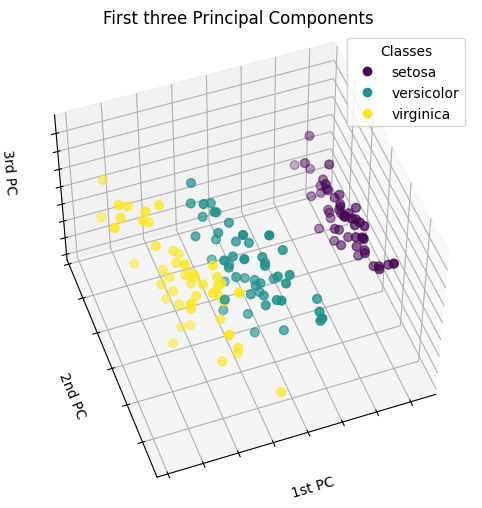

In [2]:
# NB: this approach is heavily inspired by the original visualisation on sklearn website 

# Create the figure and custom axis
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-130, azim=110)

# Perform simple PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Plot the 3 PCs 
plot1 = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

# Finishing touches 
ax.set_title("First three Principal Components ")
ax.set_xlabel("1st PC")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd PC")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd PC")
ax.zaxis.set_ticklabels([])

# Add legend
ax.legend(
    plot1.legend_elements()[0], iris.target_names, loc="best", title="Classes")

plt.show()

We can observe a really good separation between setosa and the other two, which are much closer and even overlapping, yet form fairly distinct clouds

## Assignment 1.2

Let us try to understand vectorization, visualize feature and class distributions. Try to load 20 Newsgroups - feel free to use ML tool-kits like R-Console, Weka GUI, Python Sklearn etc. with APIs/methods to load and visualize data. Provide screenshots. Explain the following in 1-2 sentences:

a) How does the raw data look like? Load using any toolkit and view the features and labels.\
The data is provided in a JSON-like format (Python dictionary) with keys including 'data', 'filenames', 'target\_names', 'target', and 'DESCR'. The target names contains the true class labels and the data contains the raw data which looks for example like this:

In [3]:
newsgroups_train = datasets.fetch_20newsgroups()

# Showing just the first raw newsgroups data, there are more fields beyond .data 
newsgroups_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

b) How do we convert the 20 Newsgroups raw text to numeric data in rows and columns? Discuss the potential options.\
Bag-of-words (BOW) is the first option wherein we count the number of unique words in each document and then count the number of the appearances of each unique word in each document. This is a simple and fast method but it doesn't take into consideration the semantic meaning of the words and the vectors will end up being quite sparse. 

Another option is Term Frequency - Inverse Document Frequency (TF-IDF). Here, we take the frequency of the words in each document (\#of appearances of a word in a document divided by the total number of words in that document) - this gives us the TF. The IDF is the natural logarithm of the number of documents total divided by the number of documents containing the specific word. We can add +1 to the denominator after the inversion to prevent dividing by zero. TF tells us how frequent the word is in a document and IDF tells us how infrequent it is in other documents (like a form of uniqueness). The final vector contains the product of TF and IDF. Words with a high value of TF-IDF are useful for distinguishing documents.


c) Visualize the popularly known tag-cloud on features or classes.\
I used a free web tool (wordclouds.com) to create a tag cloud of the classes - that is, the targets - of the 20 newsgroup dataset. 

<img src="20news_cloud.png" alt="Drawing" style="width: 700px;"/>

d) Explore and look for simple text features like n-grams, or find rare words by IDF values.
n-grams are sequences of n-adjacent items. \
I ran a simple analysis of IDF values (not shown) in the first 100 items of the 20 Newsgroups dataset. The most common word, with the lowest IDF of 1.07, was "the" in addition to the words "subject" and "from" which appeared in every single item (since they are essentially features) and thus their IDF was 1.0. Conversely, the rarest words only appeared once with IDF of 4.92 and they included terms such as "abandoned", "accident", and "burdensome". 

## Assignment 1.3

Consider the 20 Newsgroups dataset (you may try these steps or anything similar), explain the following components of a data science pipe-line in context of a classification task (in 1-2 sentences):

a) Explain the goal of a text classification task in 1-2 simple sentences.\
The goal of text classification in the context of ML is to learn a model to accurately determine class labels to any piece of text similar in nature to the original dataset. The textual data is converted into a machine-readable format and then the learned ML algorithm assign class labels to it. 

b) What is meant by preprocessing in this context? Provide examples, discuss potential benefits.\
Pre-processing of textual data for use in ML comprises the translation of machine-unreadable data to machine-readable data, in this particular context it pertains to replacing the text itself with vectors of numbers. The sci-kit example uses a bag-of-words method which produces a sparse matrix with frequency values for the words, although it disregards any ordering. The benefits are the fact that it's simple and usable by the machine, although syntactical information is left out.

c) Provide an example of a machine learning model for this task.\
One example is the (multinomial) Naive Bayes classifier. The classifier learns the probabilities of each word occurring in each class based on the training data. 

d) What is a model? How do you represent a model?\
A model is a representation of the underlying system being studied, a mathematical representation. The representation will differ based on which model is used. For example for a neural network model, the representation comprises the units, the weights, and the activation functions.

e) What learning method was used by your model? Discuss.\
Naive Bayes Classifier needs to learn its parameters from the training data, namely the prior probabilities and the conditional probabilities of feature values given class labels. Under the naive conditional independence assumption, the conditional probabilities are multiplied together to obtain the joint conditional likelihood.

f) Revisit the goal in the first step, how do we objectively measure if we were able to achieve the goal? (Try to visualize)

Accuracy: 0.879
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.86      0.86       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.87      0.85      0.86       195
comp.sys.ibm.pc.hardware       0.65      0.85      0.74       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.91      0.97      0.94       201
         sci.electronics       0.92      0.82      0.86       202
                 sci.med       0.97      0.94      0.96    

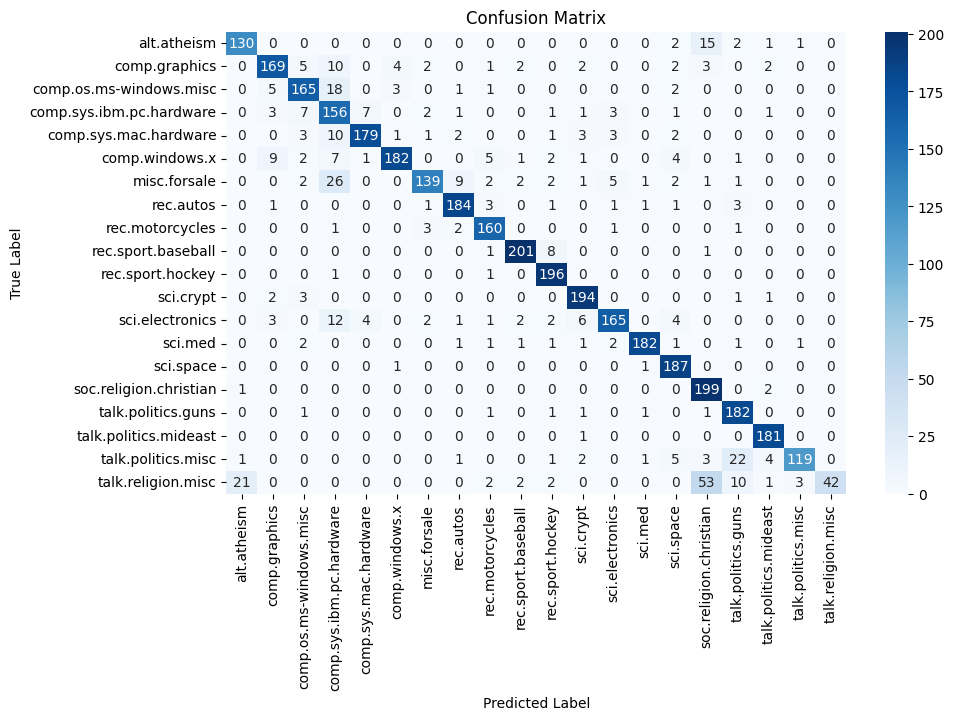

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the dataset again, this time with extra parameters 
data = datasets.fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Split data into training and testing sets, using the standard sklearn approach 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Vectorise the data. To make things a bit easier, use the standard stop list by passing 'english' as the arg to stop_words
# This means sklearn will use the previously compiled list of "words unrepresentative of the central information", ie non-signal words
tfidf_vectoriser = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf_vectoriser.fit_transform(X_train)
X_test_tfidf = tfidf_vectoriser.transform(X_test)

# Train the multinomial naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Visualize performance
plt.figure(figsize=(10, 6))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()